# **Exploratory Data Analysis**

Cette analyse vise à étudier les données de base de clustering.
L'étude métier suggère l'application de la technique marketing RFM (Recency, Frequency, Monetary)

- Recency : date du dernier achat (durée en jours pertinent pour le marketing et le commerce) 
- Frequency : nombre de commande 
- Monetary : montant total dépensé par client 


In [1]:
import pandas as pd
import os
from pathlib import Path
here = os.getcwd()
repo_wd = Path(here).parent


## **Customers dataset eda**

In [2]:
olist_orders_dataset_path = repo_wd / "data/raw/olist_orders_dataset.csv"
olist_order_payments_dataset_path = repo_wd / "data/raw/olist_order_payments_dataset.csv"
olist_customers_dataset_path = repo_wd / "data/raw/olist_customers_dataset.csv"

olist_orders_dataset = pd.read_csv(olist_orders_dataset_path)
olist_customers_dataset = pd.read_csv(olist_customers_dataset_path)
olist_order_payments_dataset = pd.read_csv(olist_order_payments_dataset_path)


In [3]:
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
olist_customers_dataset.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Optimisation mémoire sur ``olist_customers_dataset``


In [4]:
for col in olist_customers_dataset.columns:
    olist_customers_dataset[col] = olist_customers_dataset[col].astype('category')


In [5]:
olist_customers_dataset.dtypes

customer_id                 category
customer_unique_id          category
customer_zip_code_prefix    category
customer_city               category
customer_state              category
dtype: object

In [6]:
from autoviz import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [8]:
help(AV.AutoViz)

Help on method AutoViz in module autoviz.AutoViz_Class:

AutoViz(filename: str, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30, save_plot_dir=None) method of autoviz.AutoViz_Class.AutoViz_Class instance
    ##############################################################################
    ##### AUTOVIZ PERFORMS AUTOMATIC VISUALIZATION OF ANY DATA SET WITH ONE CLICK.
    #####    Give it any input file (CSV, txt or json) and AV will visualize it.##
    ##### INPUTS:                                                            #####
    #####    A FILE NAME OR A DATA FRAME AS INPUT.                           #####
    ##### AutoViz will visualize any sized file using a statistically valid sample.
    #####  - max_rows_analyzed = 150000 ### this limits the max number of rows ###
    #####           that is used to display charts                             ###
    #####  - max_cols_analyzed = 30  ### This 

Shape of your Data Set loaded: (99441, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  4
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['customer_id']
To fix these data quality issues in the dataset, impo

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
customer_id,category,0.000000,100,,,Possible ID column: drop before modeling step.
customer_unique_id,category,0.000000,96,,,96096 rare categories: Too many to list. Group them into a single category or drop the categories.
customer_zip_code_prefix,category,0.000000,15,,,14994 rare categories: Too many to list. Group them into a single category or drop the categories.
customer_city,category,0.000000,4,,,4110 rare categories: Too many to list. Group them into a single category or drop the categories.
customer_state,category,0.000000,0,,,15 rare categories: Too many to list. Group them into a single category or drop the categories.


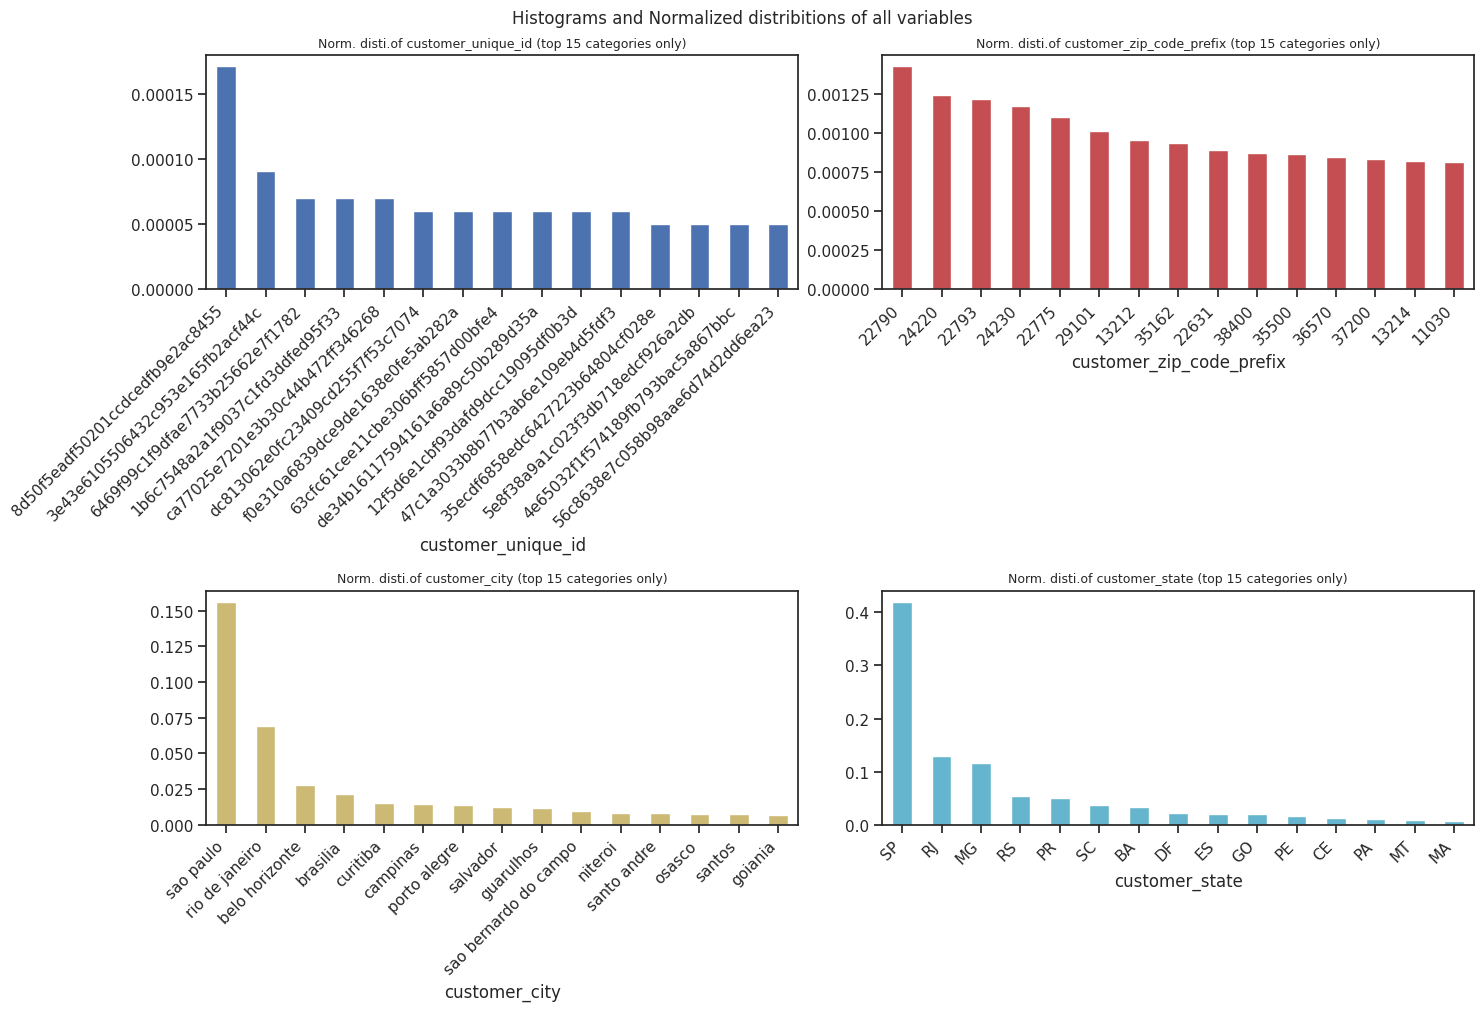

No categorical or boolean vars in data set. Hence no pivot plots...


In [ ]:
# rapide eda
dfte = AV.AutoViz(olist_customers_dataset, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=len(olist_customers_dataset),max_cols_analyzed=len(olist_customers_dataset.columns), save_plot_dir=None)


On note pas de données manquantes avec possibilité à partir de order_dataset de :

- Viusaliser les clients avec le nombre de leurs commandes respectives
- Visualiser les codes postales où les commandes ont été passées
- Visualiser les états et les villes du Brésil où les commandes ont été passées


In [7]:
print(f"{olist_customers_dataset.customer_unique_id.nunique() * 100 / len(olist_customers_dataset):.2f} %", "des clients ont passé une seule commande", "\n")
print(f"{olist_customers_dataset.customer_zip_code_prefix.nunique() * 100 / len(olist_customers_dataset):.2f} %", "des codes postales ont reçu une seule commande", "\n")
print(f"{olist_customers_dataset.customer_city.nunique() * 100 / len(olist_customers_dataset):.2f} %", "des villes où une seule commande à été passée", "\n")
print(f"{olist_customers_dataset.customer_state.nunique() * 100 / len(olist_customers_dataset):.2f} %", "des états du brésil où une seule commande à été passée durant la période de l'étude", "\n")

96.64 % des clients ont passé une seule commande 

15.08 % des codes postales ont reçu une seule commande 

4.14 % des villes où une seule commande à été passée 

0.03 % des états du brésil où une seule commande à été passée durant la période de l'étude 



## **Order payment dataset eda**

In [13]:
olist_order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
olist_order_payments_dataset.dtypes

order_id                category
payment_sequential         int64
payment_type            category
payment_installments       int64
payment_value            float64
dtype: object

In [10]:
for col in olist_order_payments_dataset.columns:
    if olist_order_payments_dataset[col].dtype==object:
         olist_order_payments_dataset[col] = olist_order_payments_dataset[col].astype('category')

In [11]:
olist_order_payments_dataset.dtypes

order_id                category
payment_sequential         int64
payment_type            category
payment_installments       int64
payment_value            float64
dtype: object

Shape of your Data Set loaded: (103886, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  2
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    5 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 103886 exceeds maximum, randomly sampling 103886 rows for EDA...

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
order_id,category,0.000000,95,,,99440 rare categories: Too many to list. Group them into a single category or drop the categories.
payment_sequential,int64,0.000000,0,1.000000,29.000000,Column has 4526 outliers greater than upper bound (1.00) or lower than lower bound(1.00). Cap them or remove them.
payment_type,category,0.000000,0,,,1 rare categories: ['not_defined']. Group them into a single category or drop the categories.
payment_installments,int64,0.000000,0,0.000000,24.000000,Column has 6313 outliers greater than upper bound (8.50) or lower than lower bound(-3.50). Cap them or remove them.
payment_value,float64,0.000000,NA,0.000000,13664.080000,Column has 7981 outliers greater than upper bound (344.41) or lower than lower bound(-115.78). Cap them or remove them.


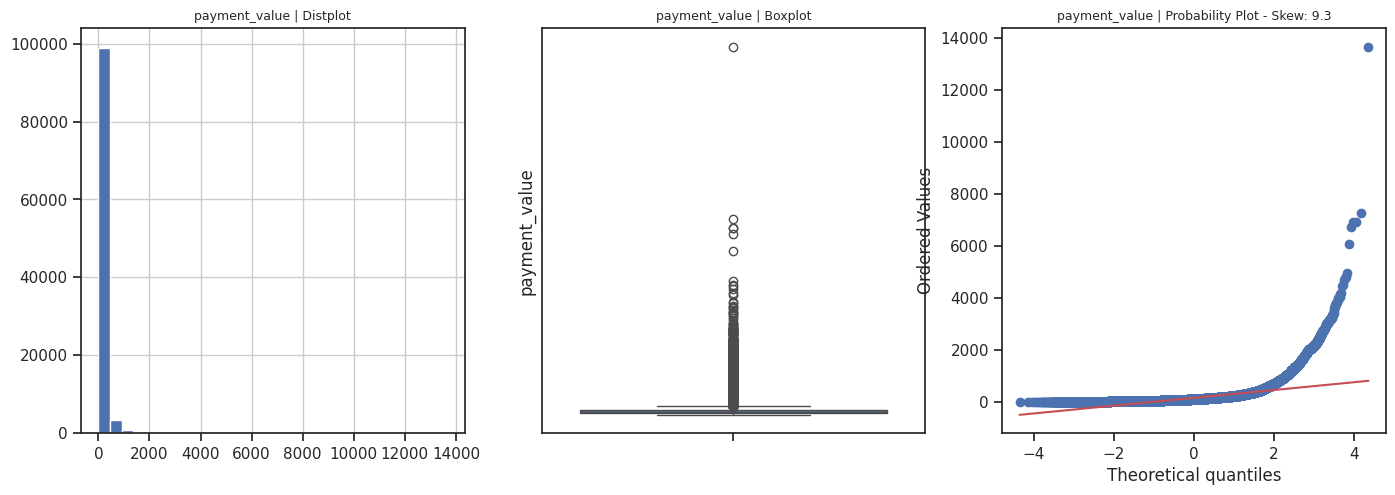

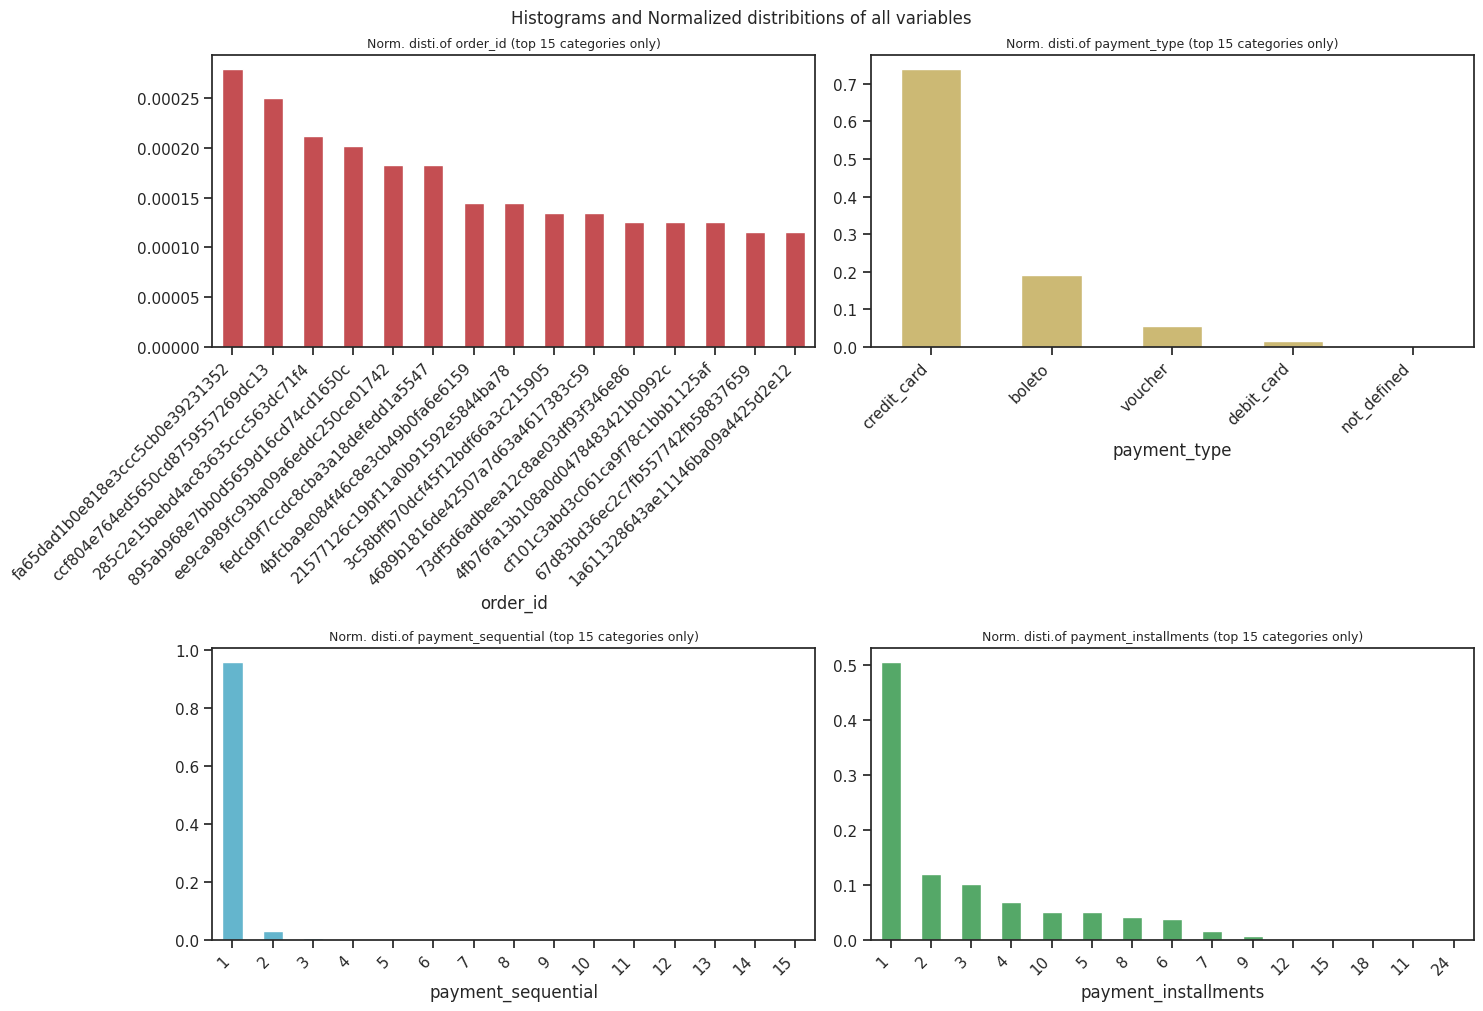

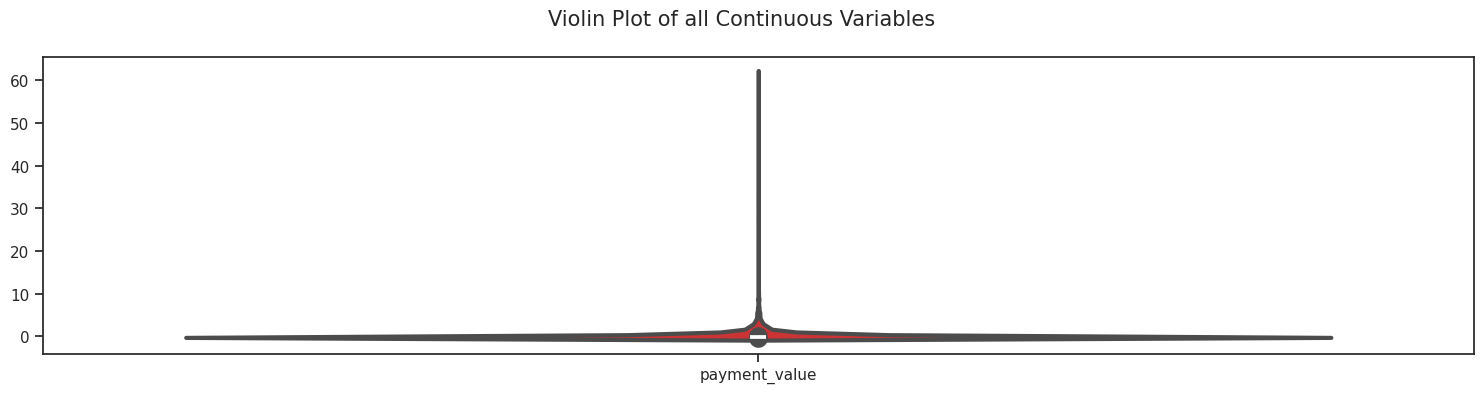

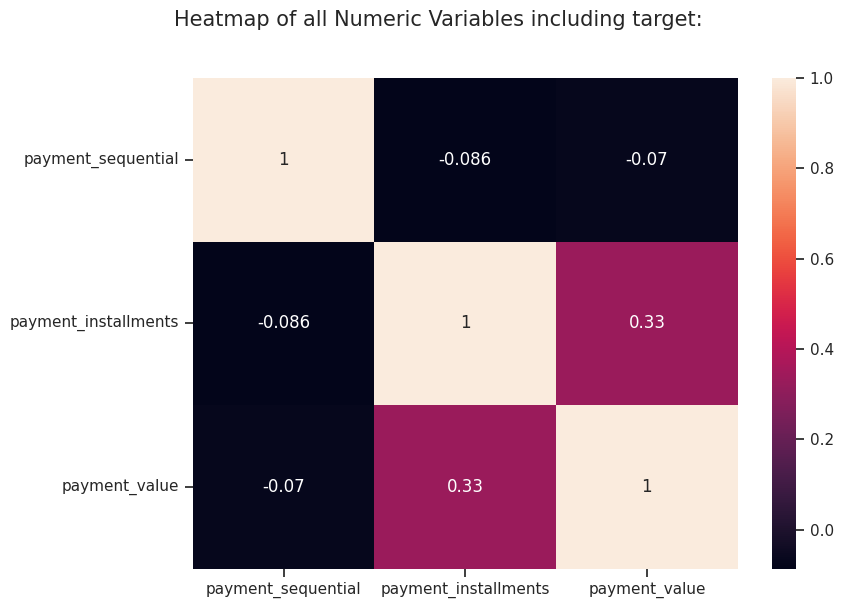

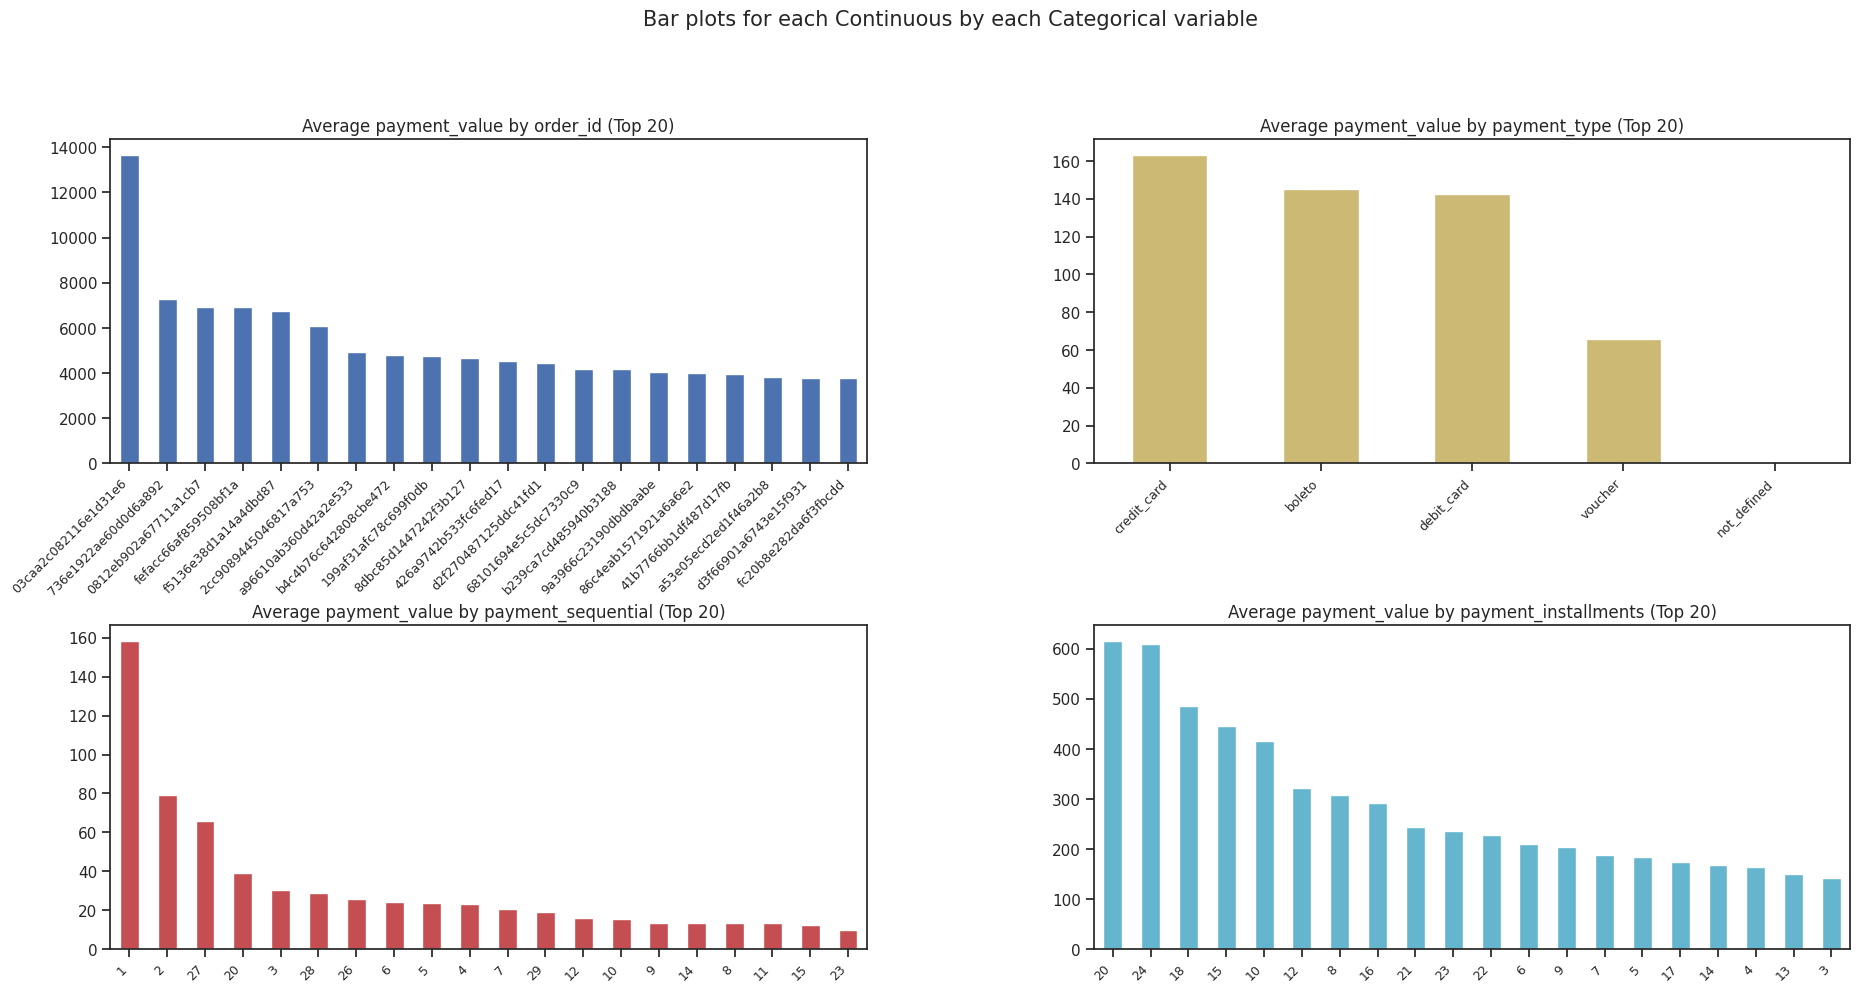

All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [34]:
# rapide eda de olist_order_payments_dataset
dfte = AV.AutoViz(olist_order_payments_dataset, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=len(olist_order_payments_dataset),max_cols_analyzed=len(olist_order_payments_dataset.columns), save_plot_dir=None)


Il est important de souligner que pour le cas du paiement dans ``olist_order_paiement_dataset``, il y a 2 cas de figure:

- Cas 1 : Paiement une fois, simple : en une ligne
- Cas 2 : Paiement en 6 fois (mensualités par exemple) mais en une ligne 
- Cas 3 : Paiement avec 2 moyens de paiement avec deux lignes (une ligne pour chaque de paiement)


In [ ]:
if len(olist_order_payments_dataset) == olist_order_payments_dataset.order_id.nunique():
    print("order_id est très probablement la clé primaire")
else:
    print("order_id est probablement une clé étrangère, la clé primaire est sûrement déclarée par une order_payment_id")

order_id est probablement une clé étrangère, la cléprimaire est sûrement déclarée par une order_payment_id


**Testons un paiement avec plusieurs payment_sequentials (par exemple 5)**

In [14]:
olist_order_payments_dataset[olist_order_payments_dataset.payment_sequential == 4].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
121,ea9184ad433a404df1d72fa0a8764232,4,voucher,1,22.49
826,e6a66a8350bb88497954d37688ab123e,4,voucher,1,8.24
1200,53177d318c723e378c2a2aa1e9b2ea8e,4,voucher,1,20.00
1810,cafe257a6af47e3a0f99d202c0bbdbf4,4,voucher,1,1.63
2638,8b1386c62489fa3207c75cddb43f7e5d,4,voucher,1,0.39


In [17]:
vc = olist_order_payments_dataset.order_id.value_counts()
order_id_with_4_rows = vc[vc==4].index.tolist()
print(f"Liste des id commandes sur plusieurs lignes :", "\n",order_id_with_4_rows)

Liste des id commandes sur plusieurs lignes : 
 ['5b03dc75d71e4a3940c88c4c9cdf6c2c', '499062ee7ee19172573b081758302721', '94aa11237bc16075072bb3569a0bf5c5', '54e9851195e7b44a91adc2564e4d082c', '458ce9ed0016410eb81b196544fd987f', 'cac1850fae99ea24a8186fad4db365bb', '086cb9cd0cf7067d77fe09f31620a52b', '6064862631581009b8eb676bc264d91f', '1f66126a353c1308d1396bec7cf67f37', '0aea5ed8df108f7cb387c099ddec65c2', '99a3d4b1228bc02abf9eec5d9a7a742d', 'de06e436fbb3dd6e10bafb5f24ed5530', '3206db48a35131540e67f96b35a30ceb', '8b1386c62489fa3207c75cddb43f7e5d', '59798edc300f7563a9bdf18b2740def9', '9a2e51589ecc5ce80f0403a55a8f789c', '707c7403d5d131e75e3d557bdd0646c4', 'cf7b757fbc81196ad9916c519c092321', '69f54f52631eb8ea8bec66cb902cf54e', 'ef8e8348ba291917542268f900fac505', '2fac55edfd9754d1a0e7ecc67d48d08d', '4f0b86c3487e56b6e9594e9dfdb5d70c', 'b20687804070fdfcbb7a183e9dd0cc1b', '102dff93d9ff9180027b57feff2f34cc', '0fa927b252421189a0e0d5725fb3832d', '499689fc885e9c2bb31f4a13fc67f499', '527f95bc978265

In [58]:
# pick the first and have a look of how it behaves
olist_order_payments_dataset[olist_order_payments_dataset.order_id == order_id_with_4_rows[0]]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
38693,5b03dc75d71e4a3940c88c4c9cdf6c2c,1,voucher,1,11.48
59218,5b03dc75d71e4a3940c88c4c9cdf6c2c,3,voucher,1,20.00
70953,5b03dc75d71e4a3940c88c4c9cdf6c2c,4,voucher,1,14.70
74603,5b03dc75d71e4a3940c88c4c9cdf6c2c,2,voucher,1,20.00


In [60]:
help(pd.DataFrame.sort_values)

Help on function sort_values in module pandas.core.frame:

sort_values(self, by: 'IndexLabel', *, axis: 'Axis' = 0, ascending: 'bool | list[bool] | tuple[bool, ...]' = True, inplace: 'bool' = False, kind: 'SortKind' = 'quicksort', na_position: 'str' = 'last', ignore_index: 'bool' = False, key: 'ValueKeyFunc | None' = None) -> 'DataFrame | None'
    Sort by the values along either axis.

    Parameters
    ----------
    by : str or list of str
        Name or list of names to sort by.

        - if `axis` is 0 or `'index'` then `by` may contain index
          levels and/or column labels.
        - if `axis` is 1 or `'columns'` then `by` may contain column
          levels and/or index labels.
    axis : "{0 or 'index', 1 or 'columns'}", default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match the length of
         the by.
    

In [61]:
order_id_with_10_rows = vc[vc==10].index.tolist()
olist_order_payments_dataset[olist_order_payments_dataset.order_id == order_id_with_10_rows[0]].sort_values(by="payment_sequential", ascending=True)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
14214,364f451ee38a4268d7c15d317021eb35,1,voucher,1,29.89
60571,364f451ee38a4268d7c15d317021eb35,2,voucher,1,14.17
93841,364f451ee38a4268d7c15d317021eb35,3,voucher,1,13.64
42716,364f451ee38a4268d7c15d317021eb35,4,voucher,1,38.99
9910,364f451ee38a4268d7c15d317021eb35,5,voucher,1,3.64
8390,364f451ee38a4268d7c15d317021eb35,6,voucher,1,16.25
97431,364f451ee38a4268d7c15d317021eb35,7,voucher,1,14.30
4576,364f451ee38a4268d7c15d317021eb35,8,voucher,1,14.82
44266,364f451ee38a4268d7c15d317021eb35,9,voucher,1,6.96
18778,364f451ee38a4268d7c15d317021eb35,10,voucher,1,1.58


On comprend que peu importe le nombre de fois déjà payer pour la même commande, le type de paiement utilisé, la table order_payment_dataset donne :
- l'ensemble des paiements effectués sur la base du paiement choisi à date de notre étude (ce qui correspond aux données de Monetary).

In [18]:
order_id_with_29_rows = vc[vc==29].index.tolist()
olist_order_payments_dataset[olist_order_payments_dataset.order_id == order_id_with_29_rows[0]].sort_values(by="payment_sequential", ascending=True)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
65641,fa65dad1b0e818e3ccc5cb0e39231352,3,voucher,1,2.95
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
82593,fa65dad1b0e818e3ccc5cb0e39231352,7,voucher,1,0.32
68853,fa65dad1b0e818e3ccc5cb0e39231352,8,voucher,1,26.02
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86


In [19]:
olist_order_payments_dataset[olist_order_payments_dataset.order_id == order_id_with_29_rows[0]].payment_value.sum()

np.float64(457.99)

In [128]:
payment_group = olist_order_payments_dataset.groupby("order_id")

In [129]:
payment_group.payment_value.sum().sort_values(ascending=False)

order_id
03caa2c082116e1d31e67e9ae3700499    13664.08
736e1922ae60d0d6a89247b851902527     7274.88
0812eb902a67711a1cb742b3cdaa65ae     6929.31
fefacc66af859508bf1a7934eab1e97f     6922.21
f5136e38d1a14a4dbd87dff67da82701     6726.66
                                      ...   
e8bbc1d69fee39eee4c72cb5c969e39d       10.07
f1d5c2e6867fa93ceee9ef9b34a53cbf        9.59
c8c528189310eaa44a745b8d9d26908b        0.00
4637ca194b6387e2d538dc89b124b0ee        0.00
00b1cb0320190ca0daa2c88b35206009        0.00
Name: payment_value, Length: 99440, dtype: float64

Il existe de commande dont le payment a été annulé probablement:


In [140]:
payment = payment_group.payment_value.sum().sort_values(ascending=False)
payment_zero_index = payment.where(payment.values==0).dropna().index.tolist()
print(payment_zero_index)


['c8c528189310eaa44a745b8d9d26908b', '4637ca194b6387e2d538dc89b124b0ee', '00b1cb0320190ca0daa2c88b35206009']


## **Order Items dataset** 

In [20]:
olist_order_items_dataset_path = repo_wd / "data/raw/olist_order_items_dataset.csv"
olist_order_items_dataset = pd.read_csv(olist_order_items_dataset_path)
olist_order_items_dataset.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [21]:
print(f"Le nombre d'id produit unique est de : {olist_order_items_dataset.product_id.nunique()}", "\n")
print(f"Le nombre de commande concerné : {olist_order_items_dataset.order_id.nunique()}" )

Le nombre d'id produit unique est de : 32951 

Le nombre de commande concerné : 98666


In [23]:
olist_order_items_dataset.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [24]:
for col in olist_order_items_dataset.columns:
    if olist_order_items_dataset[col].dtype == object:
        if col == "shipping_limit_date": # transforme to timestamp
            olist_order_items_dataset[col] = pd.to_datetime(olist_order_items_dataset[col])
        else:
            olist_order_items_dataset[col] = olist_order_items_dataset[col].astype('category')

In [25]:
olist_order_items_dataset.dtypes

order_id                     category
order_item_id                   int64
product_id                   category
seller_id                    category
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [64]:
olist_order_items_dataset[olist_order_items_dataset.order_id == order_id_with_29_rows[0]]


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
110202,fa65dad1b0e818e3ccc5cb0e39231352,1,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,2017-04-27 09:10:13,392.55,65.44


Montant payé dans le dataset ``order_items`` pour la commande **"fa65dad1b0e818e3ccc5cb0e39231352"**

In [ ]:
amount_df = olist_order_items_dataset[olist_order_items_dataset.order_id == order_id_with_29_rows[0]]
amount = amount_df.price * amount_df.order_item_id + amount_df.freight_value
print(f"Le montant de la commande {order_id_with_29_rows[0]} : {amount.values[0]:.2f}")

Le montant de la commande fa65dad1b0e818e3ccc5cb0e39231352 : 457.99


In [72]:
olist_order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


**Bon à savoir**
---
Le order_id = 00143d0f86d6fbd9f9b38ab440ac16f5 a 3 articles (same product). chaque item a des frais de fret calculés selon la taille du colis et son poids. Afin de calculer le montant total des frais pour chaque commande, il faut juste faire la somme des frais de chaque article.

Par exemple: 
soit le prix d'un article, le total order_item pour trois est : ``21.33 * 3 = 63.99``

Le total des frais est : ``15.10 * 3 = 45.30``

La commande revient alors au client de (product + freight) : ``45.30 + 63.99 = 109.29``

**Il convient alors de généraliser le calcul du montant total par commande.**

**Recherche d'une commande généralisée()**

Profil de la commande :
- différents articles 
- le nombre d'article > 1



In [80]:
# Recherche par commande en tenant compte des order_item_id
amount = (amount_df.price + amount_df.freight_value) # ici c'est le cas spécifique pour un seul article dans une commande
float(amount.values)

457.99

Nous considérons les attributs ``'order_id', 'order_item_id', 'price', 'freight_value'`` de ce nouveau dataset ``olist_order_items_dataset_df``pour résolution du clustering dans de l'application de RFM marketing.

In [112]:
olist_order_items_dataset_df = \
                        olist_order_items_dataset[
                                                    ['order_id',
                                                        'order_item_id',
                                                        'price',
                                                        'freight_value']
                                                ] # car dans une commande il peut y avoir plusieurs produits identiques
olist_order_items_dataset_df.head()

,order_id,order_item_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14


In [ ]:
olist_order_items_dataset_df_copy = olist_order_items_dataset_df.copy()
olist_order_items_dataset_df_copy['amount'] = olist_order_items_dataset_df_copy.price + \
            olist_order_items_dataset_df_copy.freight_value

In [ ]:
analytic_group = olist_order_items_dataset_df_copy.groupby(["order_id"])

In [116]:
monetary_df = analytic_group.agg(
    number_of_items=("order_item_id", "max"), # récupérer l'index max d'une commande
    total_amount=("amount", "sum")              # valeur d'une commande
)


In [117]:
monetary_df.reset_index(inplace=True, )
monetary_df.head(10)

,order_id,number_of_items,total_amount
0,00010242fe8c5a6d1ba2dd792cb16214,1,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,259.83
2,000229ec398224ef6ca0657da4fc703e,1,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,218.04
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,34.59
6,00054e8431b9d7675808bcb819fb4a32,1,31.75
7,000576fe39319847cbb9d288c5617fa6,1,880.75
8,0005a1a1728c9d785b8e2b08b904576c,1,157.60
9,0005f50442cb953dcd1d21e1fb923495,1,65.39


In [126]:
monetary_df.sort_values(by=["total_amount", "number_of_items"], ascending=[False, False]).head(10)

,order_id,number_of_items,total_amount
1455,03caa2c082116e1d31e67e9ae3700499,8,13664.08
44467,736e1922ae60d0d6a89247b851902527,4,7274.88
3130,0812eb902a67711a1cb742b3cdaa65ae,1,6929.31
98298,fefacc66af859508bf1a7934eab1e97f,1,6922.21
94439,f5136e38d1a14a4dbd87dff67da82701,1,6726.66
17114,2cc9089445046817a7539d90805e6e5a,6,6081.54
65046,a96610ab360d42a2e5335a3998b4718a,1,4950.34
69531,b4c4b76c642808cbe472a32b86cddc95,2,4809.44
9868,199af31afc78c699f0dbf71fb178d4d4,1,4764.34
54353,8dbc85d1447242f3b127dda390d56e19,1,4681.78


In [120]:
monetary_df.sort_values(by="number_of_items", ascending=False)

,order_id,number_of_items,total_amount
50137,8272b63d03f5f79c56e9e4120aec44ef,21,196.17
10459,1b15974a0141d54e36626dca3fdc731a,20,2202.40
65715,ab14fdcfbe524636d65ee38360e22ce8,20,2262.80
60941,9ef13efd6949e4573a18964dd1bbe7f5,15,783.00
25583,428a2f660dc84138d969ccd69a0ab6d5,15,1225.65
...,...,...,...
34639,5a082b558a3798d3e36d93bfa8ca1eae,1,24.23
34637,5a07264682e0b8fbb3f166edbbffc6e8,1,39.22
34636,5a071192a28951b76774e5a760c8c9b7,1,1005.43
34635,5a06fc966a12b41bf401b344464fd4b1,1,140.61


Il y a au moins un article pour chaque commande.
Seul la commande '``8272b63d03f5f79c56e9e4120aec44ef``' possède 21 lignes. Etudions de près cette commande

In [125]:
import duckdb as db
result = db.query(
    """
    select *
    from monetary_df
    order by total_amount desc
    limit 10;
    """
).df()

result.head(10)

,order_id,number_of_items,total_amount
0,03caa2c082116e1d31e67e9ae3700499,8,13664.08
1,736e1922ae60d0d6a89247b851902527,4,7274.88
2,0812eb902a67711a1cb742b3cdaa65ae,1,6929.31
3,fefacc66af859508bf1a7934eab1e97f,1,6922.21
4,f5136e38d1a14a4dbd87dff67da82701,1,6726.66
5,2cc9089445046817a7539d90805e6e5a,6,6081.54
6,a96610ab360d42a2e5335a3998b4718a,1,4950.34
7,b4c4b76c642808cbe472a32b86cddc95,2,4809.44
8,199af31afc78c699f0dbf71fb178d4d4,1,4764.34
9,8dbc85d1447242f3b127dda390d56e19,1,4681.78


Recherchons les commandes dont le paiement est ``nul`` dans la table des paiments `olist_order_payment`


In [166]:
print(payment_zero_index)

['c8c528189310eaa44a745b8d9d26908b', '4637ca194b6387e2d538dc89b124b0ee', '00b1cb0320190ca0daa2c88b35206009']


In [ ]:
payment_zero_index.append('f5136e38d1a14a4dbd87dff67da82701')

print(db.query(
    f"""
    select *
    from monetary_df
    where order_id IN {tuple(payment_zero_index)}
    limit 10;
    """
).df())

payment_zero_index.pop(len(payment_zero_index) - 1) # retirons la valeur ajoutée

               order_id              number_of_items  total_amount
0  f5136e38d1a14a4dbd87dff67da82701         1            6726.66  


'f5136e38d1a14a4dbd87dff67da82701'

On montre que les paiements nuls sont très probablement des commandes ayant été soit:
- annulées qui n'ont pas été approuvées par les vendeurs,
- ou annulées par le client lui-même
- abandonné n'ayant pas abouti 

La preuve ces commandes ne se trouvent pas dans la table des produits achetés `olist_order_items_dataset`

La table `order_dataset` pourrait nous en dire plus. Explorons cette table qui servira à la fois d'obtenir les features:
- frequency
- recency
utiles pour le clustering marketing RFM (afin d'analyse le comportement de nos clients)

## **Orders (facts table)**

In [152]:
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [27]:
olist_orders_dataset.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [ ]:
# check timestamp method
for method in dir(olist_orders_dataset.order_purchase_timestamp):
    if str(method).lower().__contains__("timestamp"):
        print(method)


to_timestamp


``to_timestamp()`` n'est pas approprié pour le besoin de transformation donc usage de ``to_datetime()``.


In [ ]:
olist_orders_dataset.order_purchase_timestamp = pd.to_datetime(olist_orders_dataset.order_purchase_timestamp)
olist_orders_dataset.order_approved_at = pd.to_datetime(olist_orders_dataset.order_approved_at)
olist_orders_dataset.order_delivered_carrier_date = pd.to_datetime(olist_orders_dataset.order_delivered_carrier_date)
olist_orders_dataset.order_delivered_customer_date = pd.to_datetime(olist_orders_dataset.order_delivered_customer_date)
olist_orders_dataset.order_estimated_delivery_date = pd.to_datetime(olist_orders_dataset.order_estimated_delivery_date)
olist_orders_dataset.order_id = olist_orders_dataset.order_id.astype("category")
olist_orders_dataset.customer_id = olist_orders_dataset.customer_id.astype("category")
olist_orders_dataset.order_status = olist_orders_dataset.order_status.astype("category")


In [29]:
olist_orders_dataset.dtypes

order_id                               category
customer_id                            category
order_status                           category
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

### **Suggestion de creation d'autres features**

- Pour chaque commande combien d'articles sont achetés
- Calculer la dépense par articles dans une commande
